<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Василий, привет!</b> 

# Рынок заведений общественного питания Москвы

Презентация: <https://disk.yandex.ru/i/ZfZqrzbI-y8bVg>

<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** -  Фонд «Shut Up and Take My Money».
    
**Цель проекта** - Провести исследование рынка недвижимости для открытия заведения общественного питания в Москве.

**Задачи проекта:**
    
- Осуществить исследование коммерческой недвижимости Москвы
- Найти интересные особенности на рынке недвижимости
- Презентовать полученные результаты исследования


**Входные данные»** - датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года (*файл moscow_places.csv*).
    
Ниже описаны обозначения столбцов:

- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
       и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.
    
**План работ:**
- *Изучение общей информации о данных*
 
    
- *Предобработка данных*
    - удаление пропусков
    - обработка аномальных значений
    - изменение типов данных
    - обработка дубликатов
    - категоризация данных
    
    
- *Изучение и проверка данных*

   
- *Детализация исследования : открытие кофейни*
    
    
- *Изучение результатов эксперимента*

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по ссылке :https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704
</div>

## Откроем файл с данными и изучим общую информацию.

In [3]:
#Импортируем библиотеку pandas
import pandas as pd

#Импортируем модуль библиотеки matplotlib  pyplot
import matplotlib.pyplot as plt

#Импортируем библиотеку numpy
import numpy as np

#Импортируем из библиотеки scipy  модуль stats
from scipy import stats as st

#Импортируем библиотеку для использования сложных математических формул
import math as mth

#Импортируем библиотеку для работы со временем
import datetime as dt

#Импортируем библиотеку seaborn
import seaborn as sns

# Импортируем библиотеку для графика воронки
import plotly.express as px

# Импортируем модуль библиотеки plotly 
from plotly import graph_objects as go

#Импортируем библиотеку для работы с регулярными выражениями
import re

#Подключаем модуль для работы с JSON-форматом
import json


#Импортируем кластер
from folium.plugins import MarkerCluster

#Импортируем карту и хороплет
from folium import Map, Choropleth, Marker

#Импортируем  библиотеку warnings и numpy для предотвращения возникновения всплывабщих ошибок
import warnings

#Код для предотвращения всплывающих ошибок
warnings.filterwarnings("ignore")

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение.
</div>

In [4]:
#Сохраним датасет в переменную df
df = pd.read_csv('moscow_places.csv')

In [5]:
#Выведем первые 5 строк датасета
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [6]:
#Выведем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Всего в датафрейме присутствует:
- 14 столбцов
- 8406 строк

In [7]:
for col in df.columns:
    print(f"{'Доля пропусков в столбце': <27}{col: <18}{round(100 - (df[col].count() / df.shape[0] * 100), 2): <3}{'%':^0}")
    print('-------------------------------------------------------------')

Доля пропусков в столбце   name              0.0%
-------------------------------------------------------------
Доля пропусков в столбце   category          0.0%
-------------------------------------------------------------
Доля пропусков в столбце   address           0.0%
-------------------------------------------------------------
Доля пропусков в столбце   district          0.0%
-------------------------------------------------------------
Доля пропусков в столбце   hours             6.38%
-------------------------------------------------------------
Доля пропусков в столбце   lat               0.0%
-------------------------------------------------------------
Доля пропусков в столбце   lng               0.0%
-------------------------------------------------------------
Доля пропусков в столбце   rating            0.0%
-------------------------------------------------------------
Доля пропусков в столбце   price             60.56%
---------------------------------------------------

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хороший способ посмотреть на долю пропусков! 

Держи еще один 😊

`pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')`
</div>

- У небольшой части заведений (6.38%) отсутвуют часы работы, возможно, это круглосуточные заведения, стоит проверить
- Очень много пропусков в столбце, отражающем среднюю цену за чашку кофе (~94%), видимо, как заведения, так и клиенты редко проставляют цены на кофе в отзывах
- У половины заведений отсутствует информация о количестве посадочных мест
- Приблизительно одинаковое количество пропусков в столбцах `price`, `avg_bill`, `middle_avg_bill`

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хорошая вводная часть.

Рекомендую создать универсальную функцию, которая будет принимать на вход датафрейм, а на выходе она будет выводить всего нужные характеристики, например, head, describe, info, дубликаты и т.п.
</div>

## Предобработка данных

### Обработка пропусков

In [8]:
#Проверим датасет на наличие дубликатов
df.duplicated().sum()

0

Дубликатов не обнаружилось

In [9]:
#Проверим категории заведений на наличие неявных дубликатов
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Дубликатов не обнаружилось

In [10]:
#Проверим наименование административных округов на наличие неявных дубликатов
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Дубликатов не обнаружилось

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Молодец, что не забываешь про явные дубликаты.
</div>

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Но, к сожалению не хватает проверки на неявные дубликаты. Неявные дубликаты могут появиться в случаях, когда данные собирались из разных источников или в системе были какие-то сбои при логировании. Добавь, пожалуйста проверку.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Произвел проверку на неявные дубликаты</b> 

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
📝 
Можно name и address привести к нижнему регистру и там еще глянуть :)
</div>

In [11]:
#Изучим строки, в которых пропущенно время работы
df[df['hours'].isna() == True]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
38,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,55.888366,37.514856,4.4,NaN,NaN,NaN,NaN,0,NaN
40,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,55.895115,37.524902,3.7,NaN,NaN,NaN,NaN,0,NaN
44,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,55.876289,37.519315,3.8,NaN,NaN,NaN,NaN,1,8.0
56,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,55.888010,37.515960,1.5,NaN,NaN,NaN,NaN,0,NaN
108,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,55.908930,37.558777,4.2,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,NaN,55.685528,37.673546,3.4,NaN,NaN,NaN,NaN,0,NaN
8375,Улица Гурьянова 55,кафе,"Москва, улица Гурьянова, 55",Юго-Восточный административный округ,NaN,55.679981,37.717034,4.5,NaN,NaN,NaN,NaN,0,NaN
8378,Восточно-грузинская кухня,быстрое питание,"Москва, Зеленодольская улица, 32, корп. 3",Юго-Восточный административный округ,NaN,55.710540,37.767864,4.3,NaN,NaN,NaN,NaN,0,120.0
8381,Аэлита,кафе,"Москва, Ферганская улица, 8, корп. 2, стр. 1",Юго-Восточный административный округ,NaN,55.708871,37.803831,3.8,NaN,NaN,NaN,NaN,0,30.0


In [12]:
#Количество уникальных категорий
df['category'].nunique()

8

Количество уникальных категорий заведений - 8

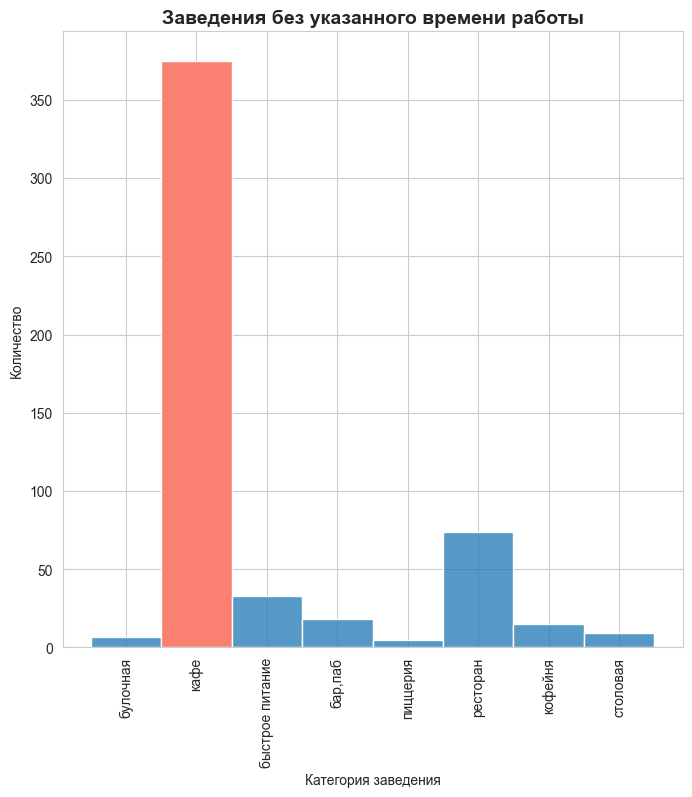

In [13]:
#Построим график, отражающий количество заведений с пропусками в часах работы
sns.set_style('whitegrid') 
fig, ax = plt.subplots()
ax = sns.histplot(x='category',data=df[df['hours'].isna() == True])
plt.xticks(rotation = 90)
ax.set_title('Заведения без указанного времени работы', fontweight="bold", fontsize=14)
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество')
ax.patches[1].set_facecolor('salmon')
#Задаем ширину и высоту общему графику
fig.set_figheight(8) 
fig.set_figwidth(8)

Как мы видим, в каждом типе заведений присутсвуют пропуски, соответсвенно, мы не можем утверждать, что пропуски обозначают круглосуточное заведение (будь то бары, пабы, рестораны и тому подобные заведения), значит, их можно удалить.

Наибольшее количество пропусков у заведений с категорией `кафе`, возможно, это связанно с тем, что во всем датасете заведений этой категории больше всего (это мы выясним дальше).

In [14]:
df = df[df['hours'].isna() == False].reset_index()

В остальных столбцах имеет смысл заполнить пропуски заглушкой "Не указано"

In [15]:
df = df.fillna('не_указано')

### Добавление новых столбцов

In [16]:
#Добавим новый столбец с указанием улицы заведения
for i in range(len(df)):
    #Используем регулярные выражения для вычленения названия улиц между запятыми
    m = re.search(', (.+?),', df.loc[i, 'address'])
    if m:
        found = m.group(1)
    df.loc[i, 'street'] = found

In [17]:
#Добавим столбец, содержаний информацию о том, круглосуточное ли заведение
df['is_24/7'] = df['hours'].str.contains('круглосуточно', regex=False)

In [18]:
#Посмотрим, как теперь выглядит наш датафрейм
df.head()

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,не_указано,не_указано,не_указано,не_указано,0,не_указано,улица Дыбенко,False
1,1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,не_указано,0,4.0,улица Дыбенко,False
2,2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,не_указано,0,45.0,Клязьминская улица,False
3,3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,не_указано,Цена чашки капучино:155–185 ₽,не_указано,170.0,0,не_указано,улица Маршала Федоренко,False
4,4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,не_указано,1,148.0,Правобережная улица,False


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Здесь все корректно. Двигаемся дальше.
</div>

## Анализ имеющихся данных

### Категории заведений

In [19]:
labels = []
values = []
#Напишем цикл для заполнения списков и построения круговой диаграммы
for value in df['category'].unique():
    labels.append(value)
    values.append(df[df['category']==value]['category'].count())

In [20]:
print(labels)
print(values)

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
[2003, 1969, 1398, 628, 747, 570, 249, 306]


In [21]:
#Напишем для параметра "explode" кортеж со значениями для выделения самой большой доли
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [23]:
#Выведем через цикл полученные результаты
print('В датасете представленны следующие категории заведений (в порядке убывания количества заведений):')
for _ in range(len(labels)):
    print(f'Количество заведений категории {labels[_]} составляет:' f'{values[_]} заведений' f'({round(values[_] / sum(values)* 100, 2)}%)')
    print('-------------------------------------------------------------')

В датасете представленны следующие категории заведений (в порядке убывания количества заведений):
Количество заведений категории кафе составляет:2003 заведений(25.45%)
-------------------------------------------------------------
Количество заведений категории ресторан составляет:1969 заведений(25.02%)
-------------------------------------------------------------
Количество заведений категории кофейня составляет:1398 заведений(17.76%)
-------------------------------------------------------------
Количество заведений категории пиццерия составляет:628 заведений(7.98%)
-------------------------------------------------------------
Количество заведений категории бар,паб составляет:747 заведений(9.49%)
-------------------------------------------------------------
Количество заведений категории быстрое питание составляет:570 заведений(7.24%)
-------------------------------------------------------------
Количество заведений категории булочная составляет:249 заведений(3.16%)
-------------------

Самая:
- большая доля у заведений типа `кафе` (25.45%) и `ресторан` (25.02%)
- маленькая доля у заведений типа `булочная` (3.16%) и `столовая` (3.89%)

In [24]:
#Составим сводную таблицу для изучения медианного количества мест вы заведениях каждой категории
df_ouf_plug = df[df['seats']!='не_указано']
df_ouf_plug['seats'] = df_ouf_plug['seats'].astype('int')
pivot_seats = (df_ouf_plug.groupby('category', as_index=False)
               .agg({'seats':['median']})
               .droplevel(1,axis=1)
               .sort_values(by='seats', ascending = False))

In [25]:
pivot_seats

,category,seats
6,ресторан,86.0
0,"бар,паб",82.5
4,кофейня,80.0
7,столовая,73.5
2,быстрое питание,69.5
3,кафе,60.0
5,пиццерия,55.0
1,булочная,50.0


Было решено провести оценку не по средней, а по медиане, потому что есть заведения (можно посмотреть на гистограмме для каждого заведения), которые сильно выбиваются из общей массы по количеству сидячих мест в каждой категории.

In [26]:
#Выведем через цикл полученные результаты

for _ in range(len(pivot_seats)):
    print(f'Медианное значение мест для категории {pivot_seats.loc[_][0]} составляет:' f'{pivot_seats.loc[_][1]}')
    print('-------------------------------------------------------------')

Медианное значение мест для категории бар,паб составляет:82.5
-------------------------------------------------------------
Медианное значение мест для категории булочная составляет:50.0
-------------------------------------------------------------
Медианное значение мест для категории быстрое питание составляет:69.5
-------------------------------------------------------------
Медианное значение мест для категории кафе составляет:60.0
-------------------------------------------------------------
Медианное значение мест для категории кофейня составляет:80.0
-------------------------------------------------------------
Медианное значение мест для категории пиццерия составляет:55.0
-------------------------------------------------------------
Медианное значение мест для категории ресторан составляет:86.0
-------------------------------------------------------------
Медианное значение мест для категории столовая составляет:73.5
-------------------------------------------------------------

Самое:
- большое медианное значение у заведений типа `ресторан` - 86
- маленькое медианное значение у заведений типа`булочная` - 50

### Соотношение сетевых и несетевых заведений

In [27]:
#Таблица для анализа сетевых и несетевых заведений
chain_p = pd.DataFrame(columns=['Число заведений', 'Тип заведения'])
chain_p['Число заведений'] = df.groupby(by='chain')['chain'].count()
chain_p['Тип заведения'] = ['Несетевое', 'Сетевое']

In [28]:
chain_p

,Число заведений,Тип заведения
chain,,
0,4781,Несетевое
1,3089,Сетевое


Количество:
- Несетевых заведений - 4781 (60.75%)
- Сетевых заведений - 3089 (39.25%)

Интересное наблюдение, в несетевых местах больше выбросов по количеству мест (можно объяснить тем, что в сетевых местах есть стандарты, в которых определяется даже количество мест)

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Супер, именно доля заведений корректно дает ответ на поставленный вопрос. 
</div>

### Категории заведений в разрезе его типа

In [29]:
chain_1 = []
for value in df['category'].unique():
    chain_1.append(df[(df['category']==value) & (df['chain']==1)]['category'].count())

In [30]:
df_share_chain = pd.DataFrame(columns=['labels', 'count_of_places', 'yes_chain'])
df_share_chain['labels'] = labels
df_share_chain['count_of_places'] = values
df_share_chain['yes_chain'] = chain_1
df_share_chain['share_yes_chain'] = round(df_share_chain['yes_chain'] / df_share_chain['count_of_places'], 2)
df_share_chain = df_share_chain.sort_values(by='share_yes_chain', ascending = False).reset_index(drop=True)

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Все верно, но локаничней бы смотрелось на барплот :)
</div>

### Топ - 15 популярных сетей в Москве

In [31]:
# Создадим сводную таблицу, содержащую топ - 15 заведений по их количеству
pivot_top = (df.pivot_table(index = ['category','name','chain'], 
                       values =['street'],
                       aggfunc ='count')
         .sort_values(by='street',ascending=False)
         .rename(columns={'street': 'count_of_places'})).head(15)

In [33]:
#Сделаем датасет для построения барплота
for_barplot = (pivot_top
               .droplevel([1,2],axis=0)
               .groupby((pivot_top.droplevel([1,2],axis=0)).index)
               .agg({'count_of_places':'sum'})
               .sort_values(by='count_of_places', ascending = False))

In [34]:
#Создадим интерактивную круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=pivot_top.index.get_level_values('name'), values=pivot_top['count_of_places'])])
fig.update_layout(title='Топ - 15 по количеству заведений (доли от общего числа из топ-15)')
fig.show()

In [41]:
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

In [42]:
iplot(fig)

### Анализ административных районов

In [35]:
#Создадим сводную таблицу для построения барплота
pivot_district = df.pivot_table(index='district', columns='category',
                       values =['street'],
                       aggfunc ='count')

In [36]:
#Удалим лишний уровнь индексов
pivot_district = pivot_district.droplevel(0, axis=1)

In [37]:
#Отсортируем датасет по количеству заведений
pivot_district['sum'] = pivot_district.sum(axis=1)
pivot_district = pivot_district.sort_values(by='sum', ascending = False)

In [38]:
pivot_district

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,sum
district,,,,,,,,,
Центральный административный округ,364,50,85,444,426,112,665,65,2211
Северный административный округ,65,37,54,206,191,76,179,38,846
Северо-Восточный административный округ,57,28,79,229,157,66,174,40,830
Южный административный округ,65,25,81,215,130,73,195,43,827
Западный административный округ,48,36,60,191,148,71,207,24,785
Восточный административный округ,51,23,66,218,102,71,153,39,723
Юго-Западный административный округ,37,26,57,196,94,64,159,17,650
Юго-Восточный административный округ,37,12,61,218,88,55,135,23,629
Северо-Западный административный округ,23,12,27,86,62,40,102,17,369


In [39]:
#Удалим столбец для удоства построения диаграммы
pivot_district = pivot_district.drop(columns=['sum'])

In [40]:
#Построим столбчатую диаграмму
fig = px.bar(pivot_district,
             x=pivot_district.index,
             y=pivot_district.columns)


#Оформим график
fig.update_xaxes(tickangle=45)
fig.update_layout(title='Количество заведений различных категорий по районам',
                   xaxis_title='Название района',
                   yaxis_title='Количество заведений')
fig.show() 

В датасете присутвуют следующие районы:
- Центральный административный округ - больше всего заведений различных категорий
- Западный административный округ
- Южный административный округ
- Северный административный округ
- Северо-Восточный административный округ
- Юго-Западный административный округ
- Восточный административный округ
- Юго-Восточный административный округ
- Северо-Западный административный округ - меньше всего заведений различных категорий

По графику видно, что подавляющее большинство от всех заведений в каждом районе составляют `рестораны` и `кафе`.